In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import uproot

In [2]:
def pred_target_hists(model_path, bins=100, range=[[-1,1],[-1,1]], log=False):
    predict_output_files = [file for file in
                            os.listdir(
                                os.path.join(
                                    '/users/oskar.rothbacher/CMS/ParticleNet4EFT/TopDecay/models/', model_path, 'predict_output'))]
    #print(*predict_output_files, sep='\n')
    n_plots = int(np.ceil(np.sqrt(len(predict_output_files))))
    plt.subplots(figsize=[12*n_plots,10*n_plots])
    for n, file in enumerate(predict_output_files):
        with uproot.open(os.path.join('/users/oskar.rothbacher/CMS/ParticleNet4EFT/TopDecay/models/', model_path, 'predict_output', f'{file}:Events')) as f:
            predict = f.arrays(library='np')
            plt.subplot(n_plots, n_plots, n+1)
            hist=plt.hist2d(predict['lin_ctWRe'], predict['output'], bins=bins, range=range, norm=colors.SymLogNorm(1) if log else None)
            plt.plot([-1,1],[-1,1])
            plt.colorbar()
            plt.title(file)

In [ ]:
# this traiing was done with --in-memory ssteps-per-epoch 1000
pred_target_hists('mlp_hl_lin_test_8_in_memory', range=[[-0.5,0.2],[-0.5,0.2]], log=True)

In [ ]:
# this traiing was done with --in-memory ssteps-per-epoch 1000
pred_target_hists('mlp_hl_lin_test_8_in_memory', range=[[-0.5,0.2],[-0.5,0.2]], log=True)

In [ ]:
# this training was done with the default data loading strategy (very slow, stopped early)
pred_target_hists('mlp_hl_lin_test_9_default', range=[[-0.5,0.2],[-0.5,0.2]], log=True)

In [ ]:
# training on delphes dataset
pred_target_hists('mlp_hl_lin_delphes_test_0', range=[[-0.5,0.2],[-0.5,0.2]], log=True)

/tmp/ipykernel_6865/1549018851.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_plots, n_plots, n+1)


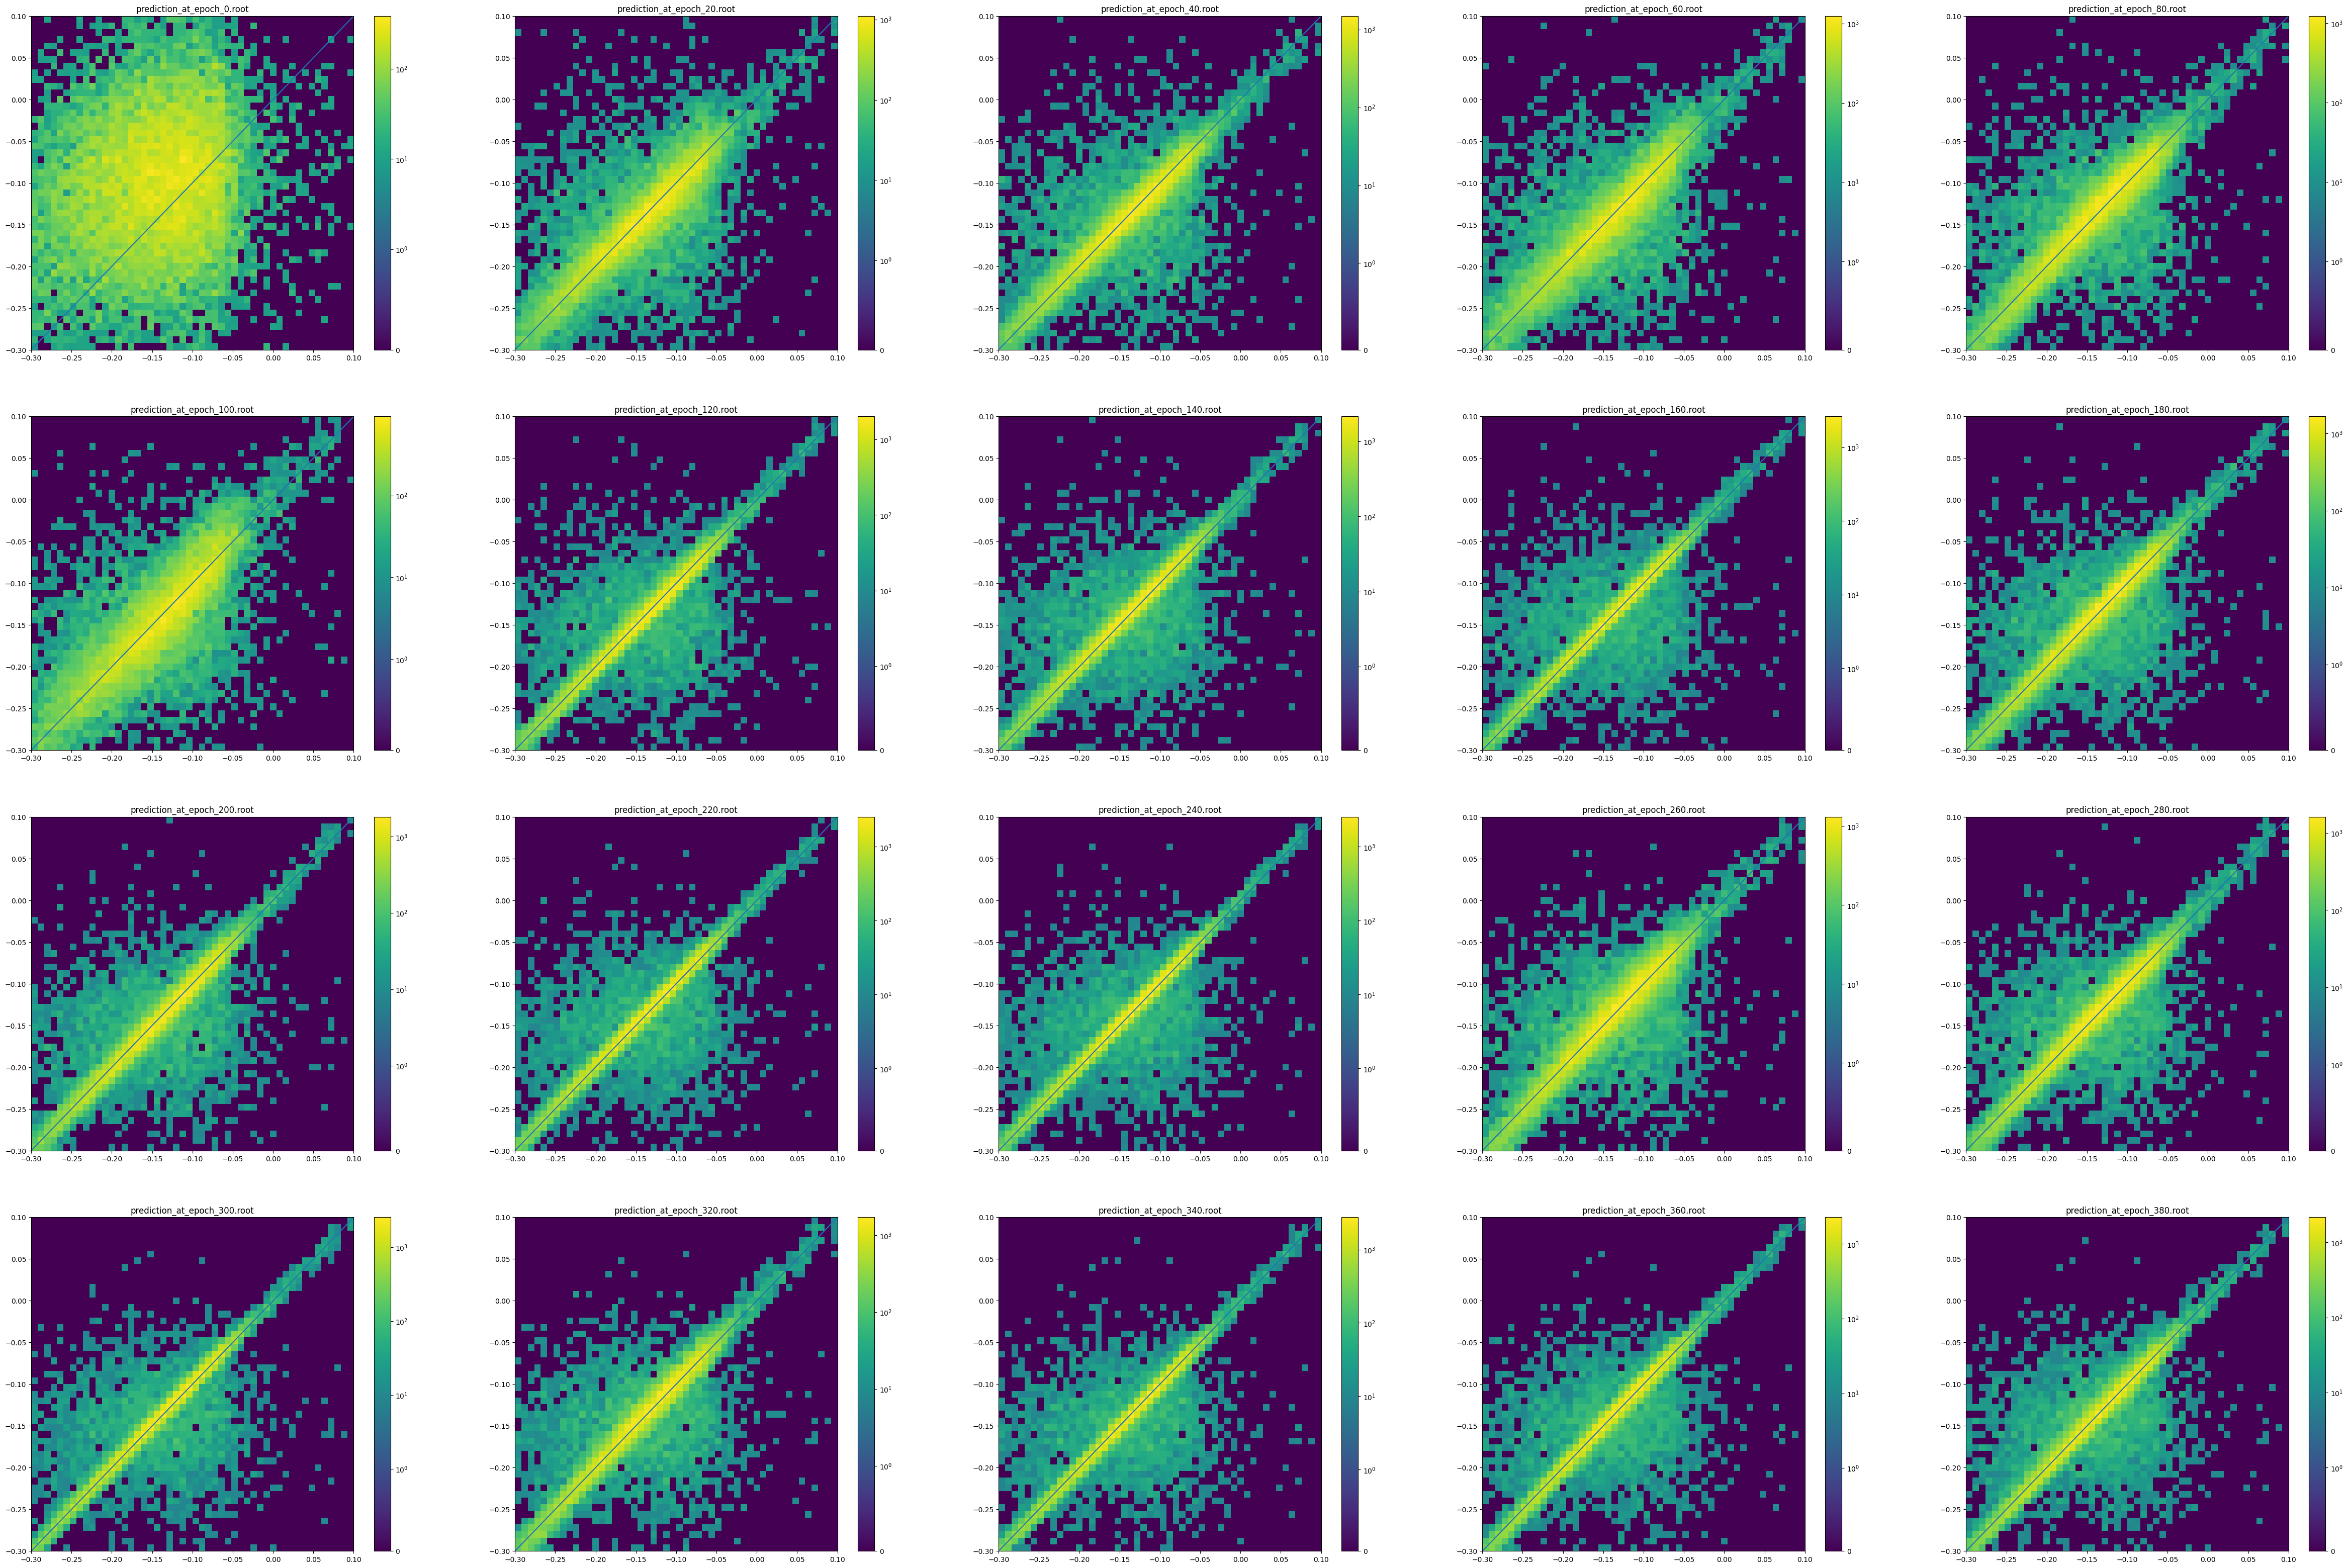

In [60]:
# this training was done with ---fetch-by-file fetch-step 1
pred_target_hists('mlp_hl_lin_test_6', bins=50, range=[[-0.3,0.1],[-0.3,0.1]], log=True)

# Comparison of training with gen data vs delphes data

## gen data

### log scale

/tmp/ipykernel_6865/1549018851.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_plots, n_plots, n+1)


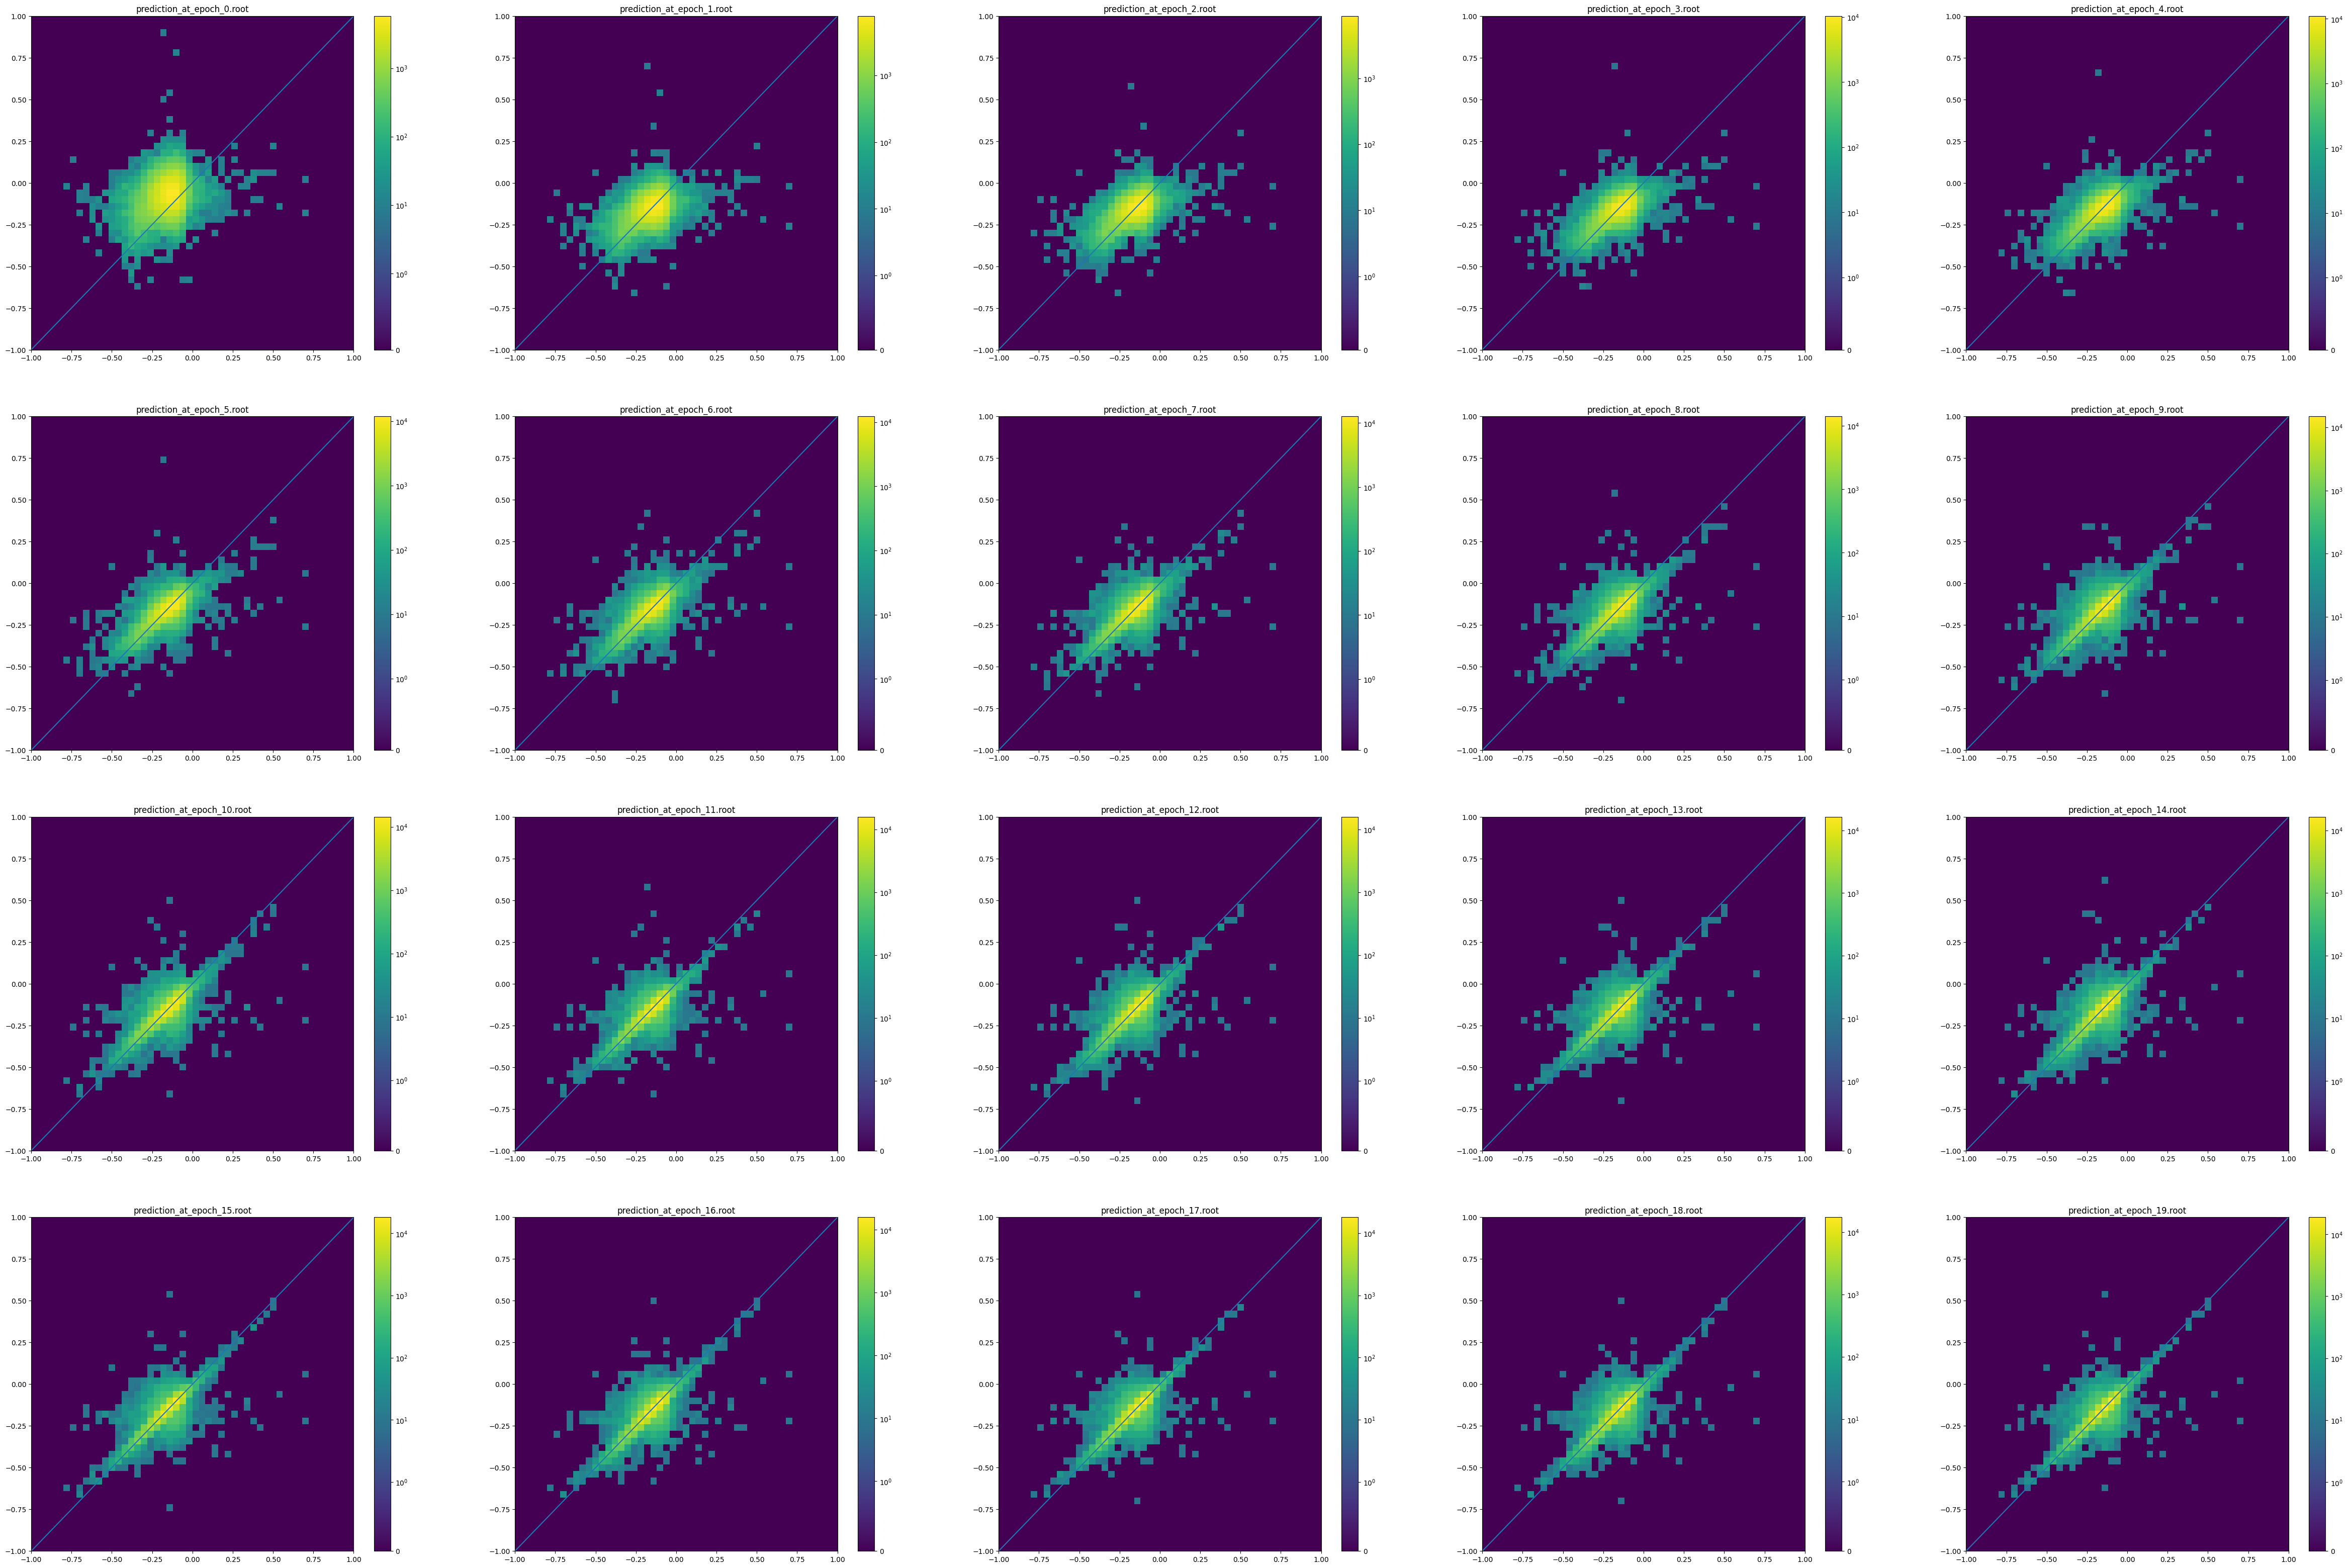

In [49]:
# this training was done with ---fetch-by-file fetch-step 1
pred_target_hists('mlp_hl_lin_test_7', bins=50, range=[[-1,1],[-1,1]], log=True)

### lin scale zoomed in

/tmp/ipykernel_6865/1549018851.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_plots, n_plots, n+1)


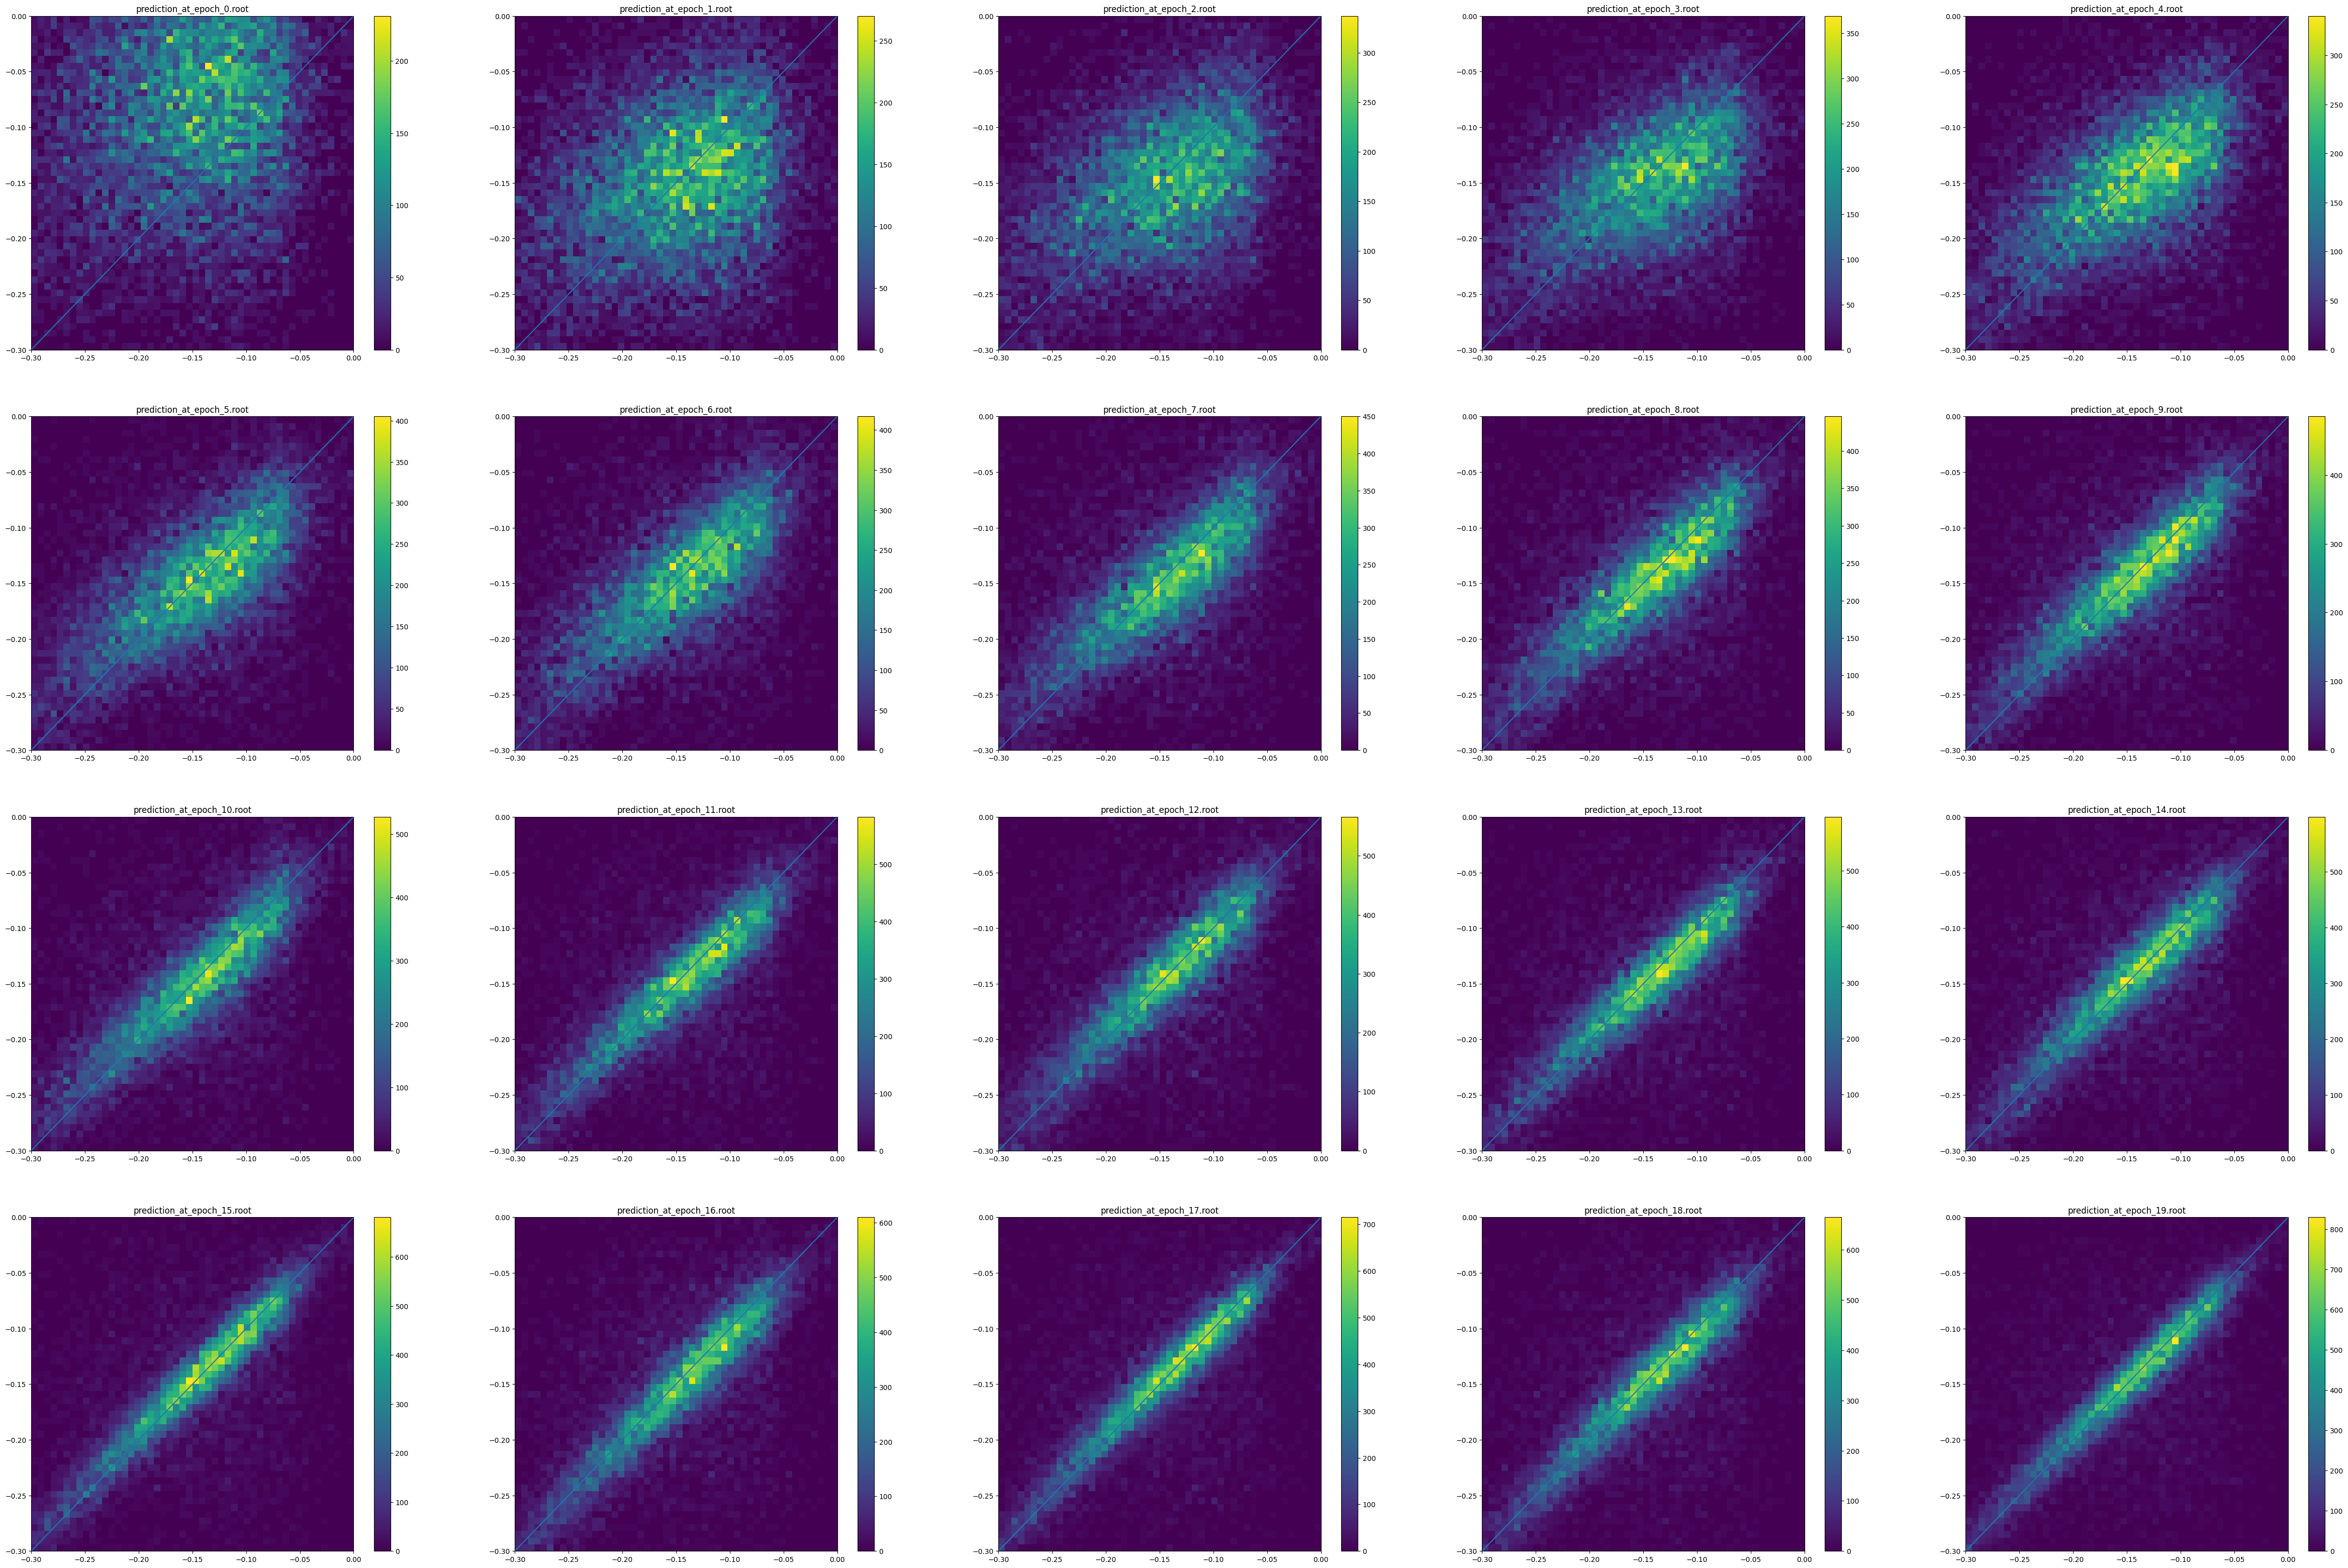

In [50]:
# this training was done with ---fetch-by-file fetch-step 1
pred_target_hists('mlp_hl_lin_test_7', bins=50, range=[[-0.3,0],[-0.3,0]], log=False)

## delphes data

### log scale

/tmp/ipykernel_6865/1549018851.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_plots, n_plots, n+1)


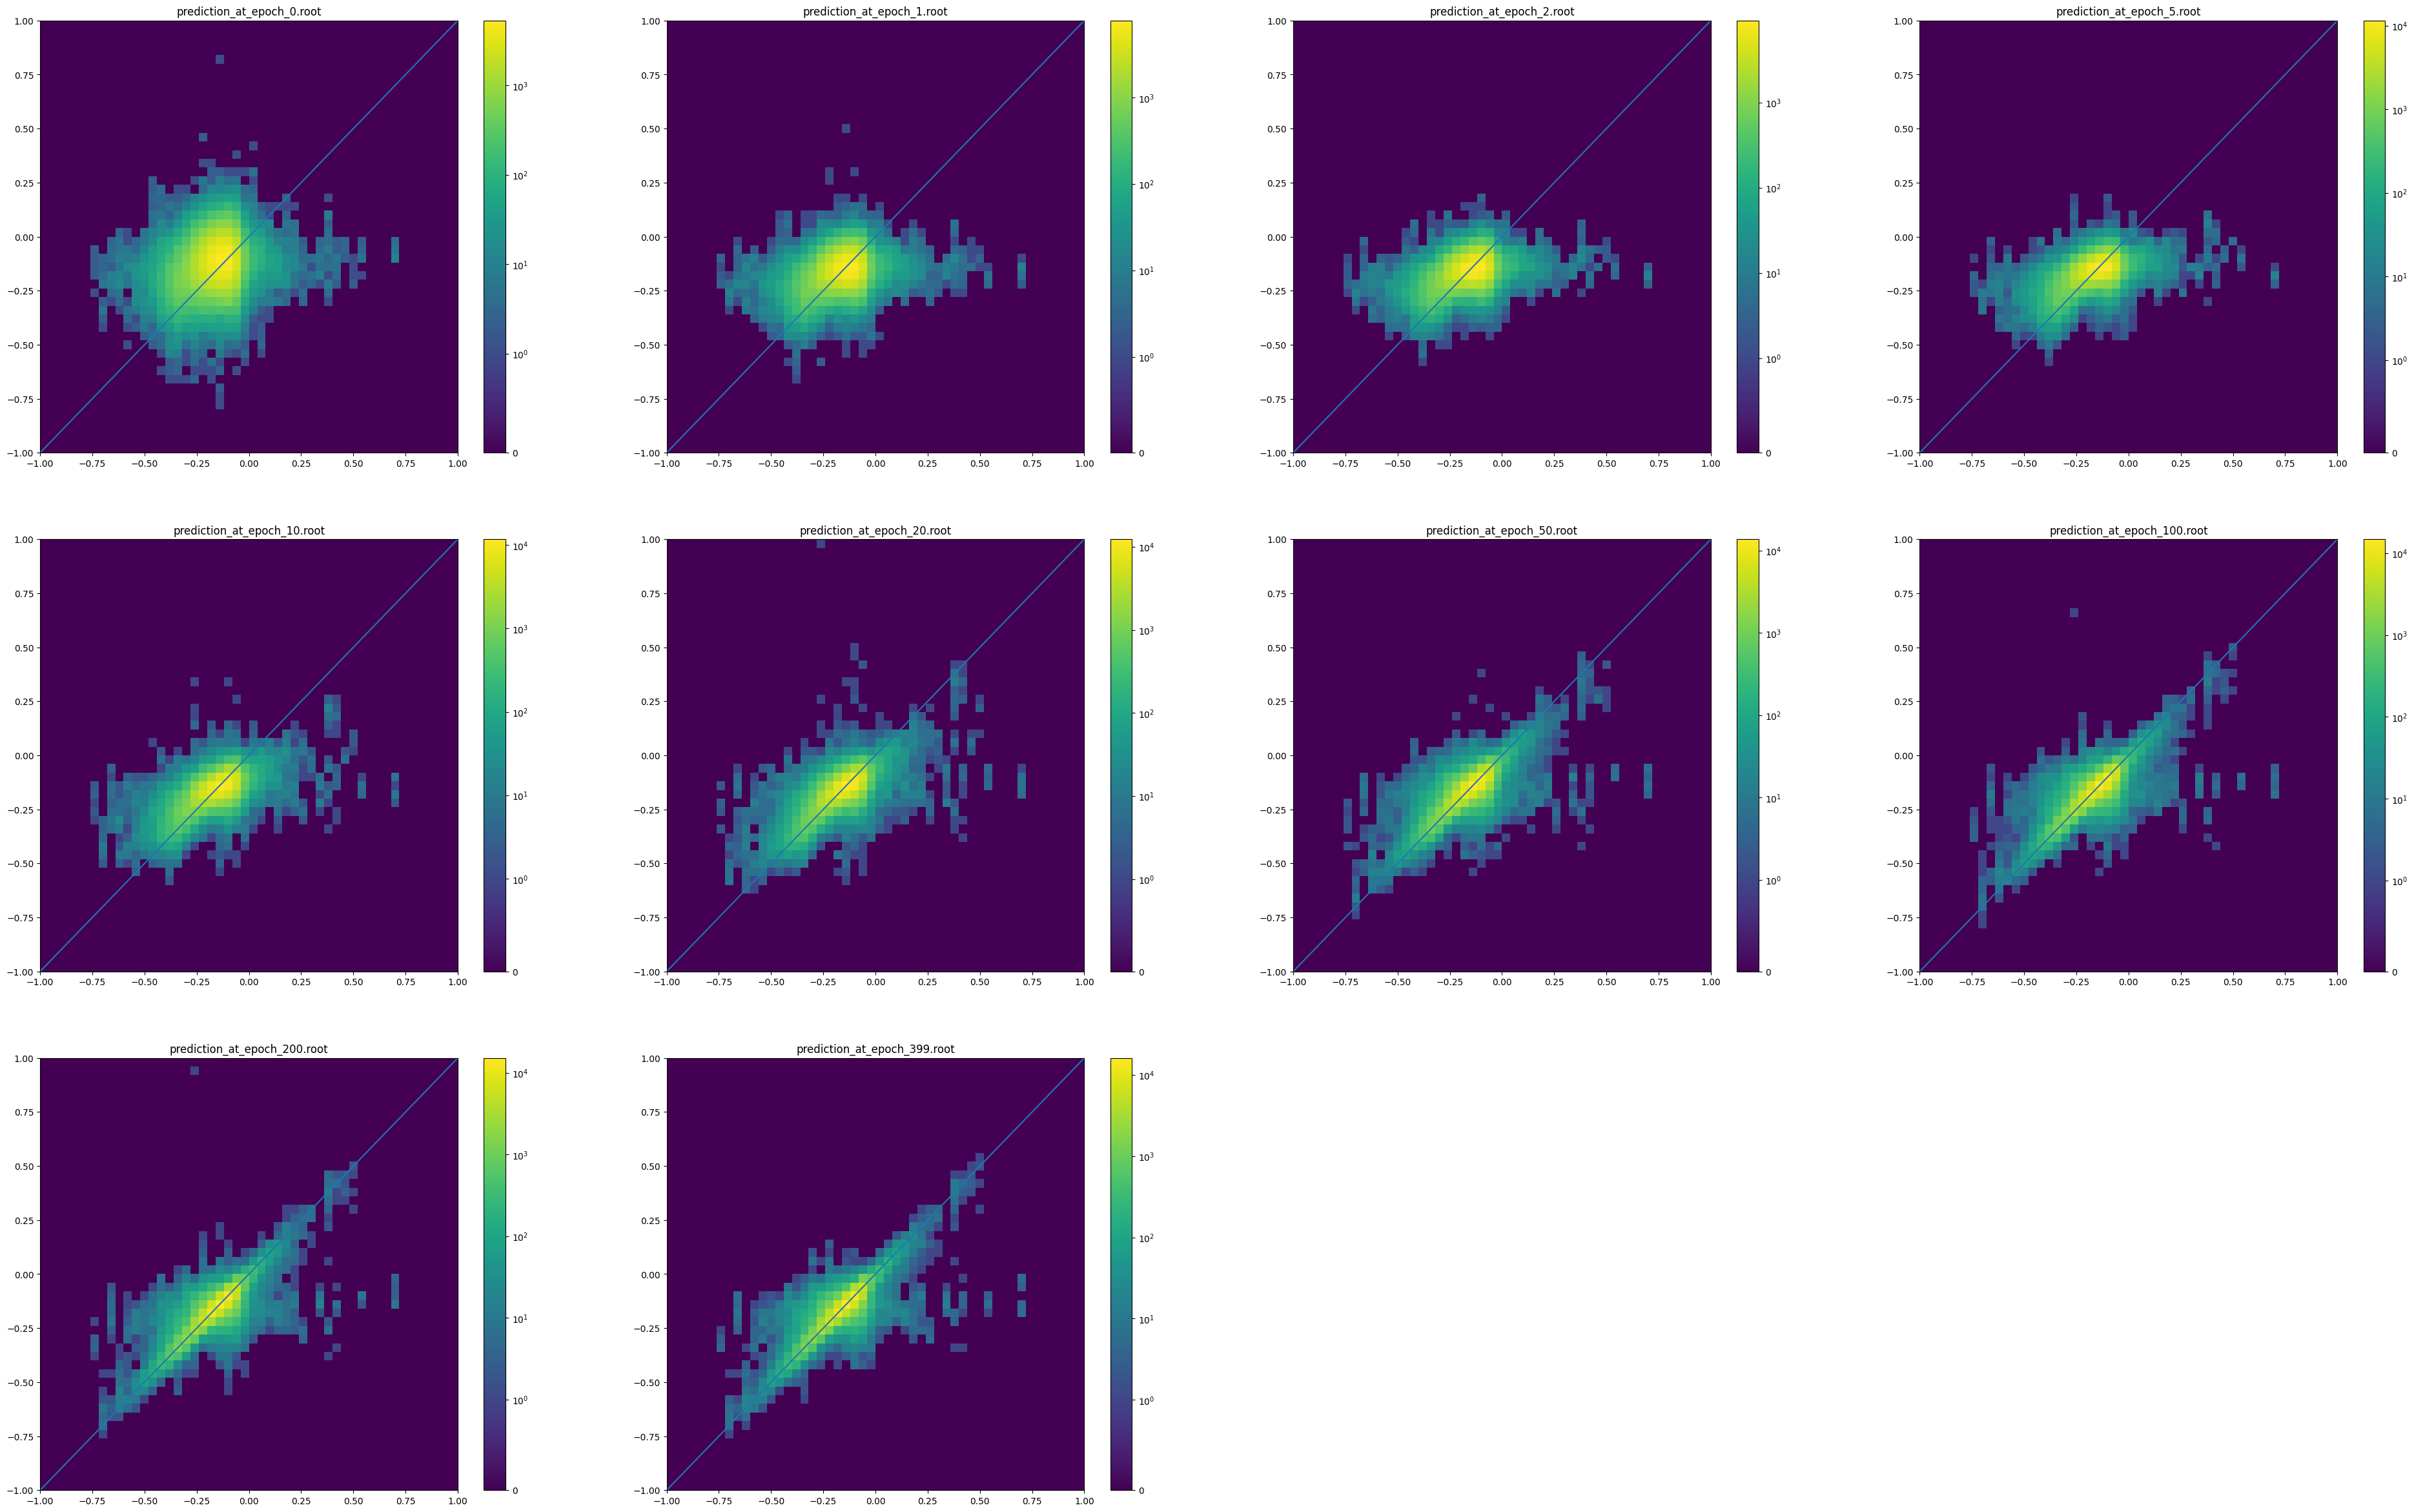

In [55]:
# training on delphes dataset
pred_target_hists('mlp_hl_lin_delphes_test_1', bins=50, range=[[-1,1],[-1,1]], log=True)

### lin scale zoomed in

/tmp/ipykernel_6865/1549018851.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_plots, n_plots, n+1)


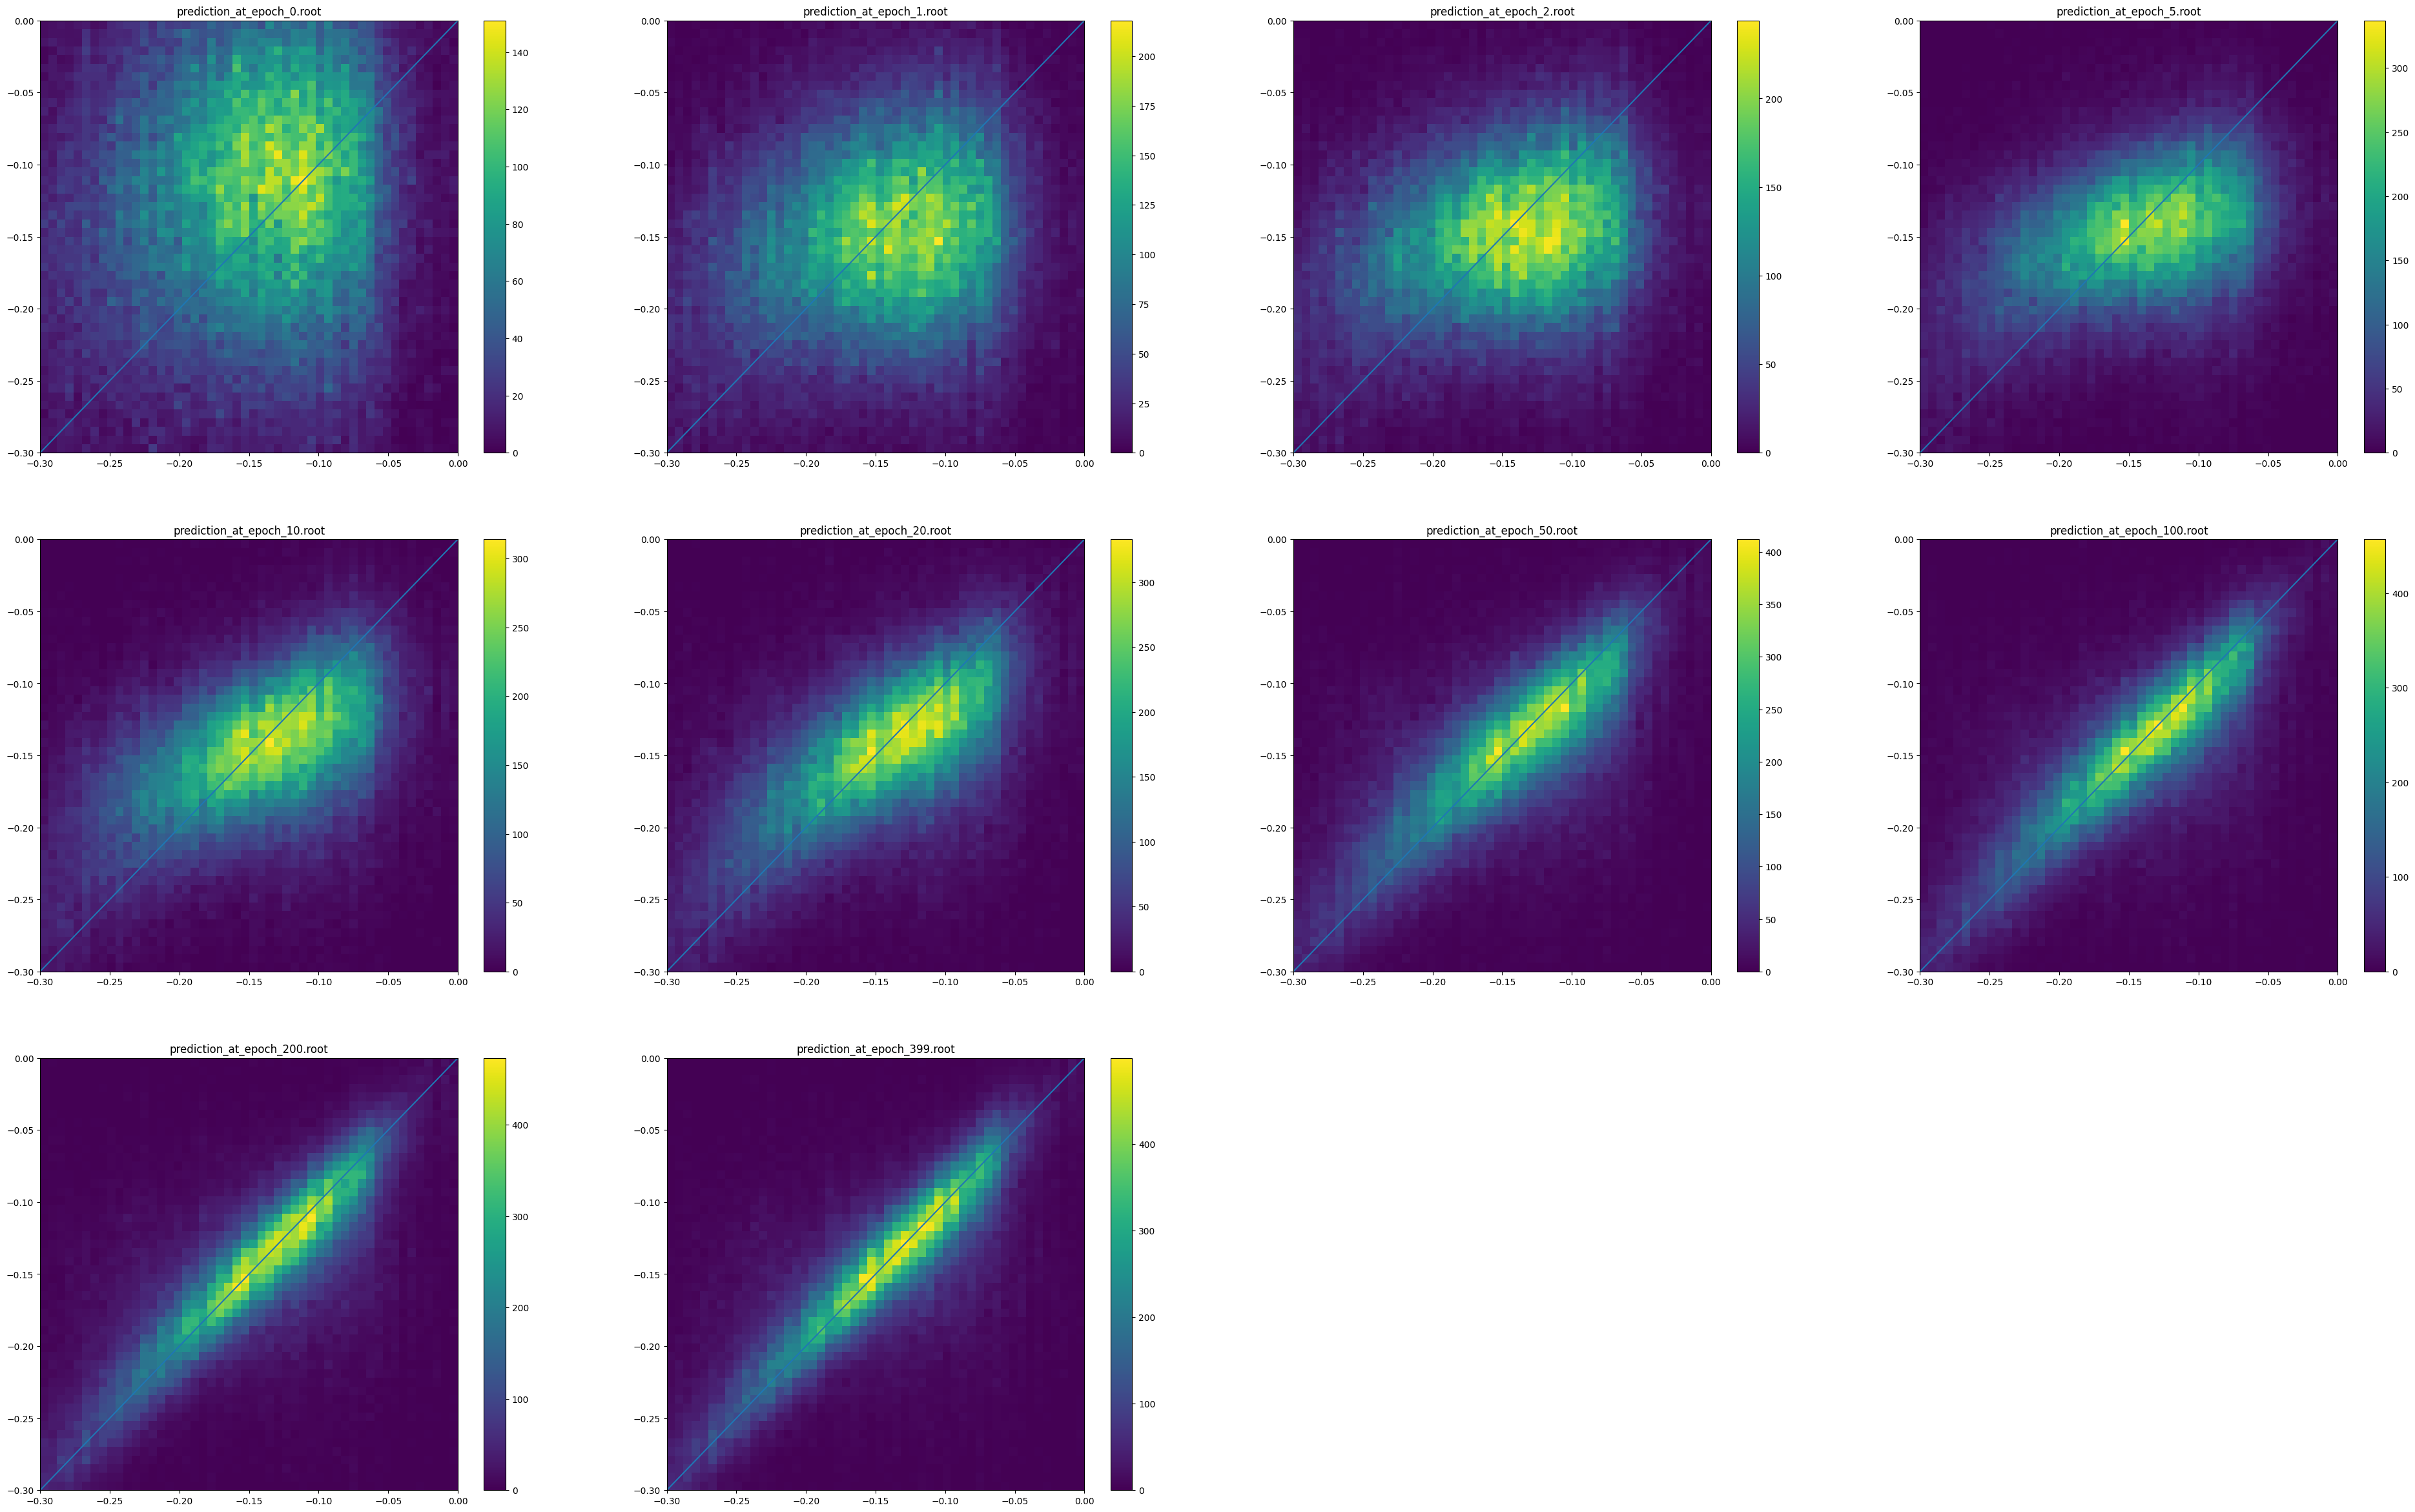

In [52]:
# training on delphes dataset
pred_target_hists('mlp_hl_lin_delphes_test_1', bins=50, range=[[-0.3,0],[-0.3,0]], log=False)

# outliers in targe_ctWRe

In [53]:
selection = '(delphesJet_pt>500) & (delphesJet_SDmass>0) & (abs(dR_delphesJet_maxq1q2b)<0.6) & (delphesJet_SDsubjet1_mass>=0)'
files = '/scratch-cbe/users/robert.schoefbeck/HadronicSMEFT/postprocessed/gen/v5/tschRefPointNoWidthRW/' +\
    'tschRefPointNoWidthRW_[8-9]?.root'
target_ctWRe = uproot.concatenate(files, cut=selection, branches='target_ctWRe', library='np')['target_ctWRe']

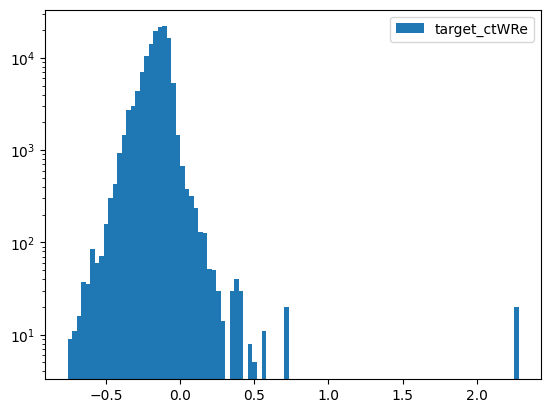

In [54]:
plt.hist(target_ctWRe, bins=100, log=True, label='target_ctWRe' )
plt.legend()